In [1]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.ui import Select
import requests
from bs4 import BeautifulSoup
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
url = "https://gofederation.ru/tournaments/"
select_xpath = '/html/body/div/div/div[2]/div/div/div[1]/div[2]/div/select'
table_xpath = '/html/body/div/div/div[2]/div/div/div[1]/div[5]/div/div'
driver = webdriver.Chrome()
driver.get(url)

select_element = Select(driver.find_element(By.XPATH, select_xpath))
options = select_element.options

df = pd.DataFrame({"location": [], "title": [], "href": [], "year": []})
for option in options:
    select_element.select_by_visible_text(option.text)
    WebDriverWait(driver, 50).until(EC.presence_of_element_located((By.XPATH, table_xpath)))

    soup = BeautifulSoup(driver.page_source, 'html.parser')

    table = soup.find("div", {"class": 'tournament-list'})

    location = [row.string for row in table.find_all('div', {"class": 'location'})]
    title = [row.string for row in table.find_all('a', {"class": ""})]
    href = [f"https://gofederation.ru{row["href"]}/walllist" for row in table.find_all('a', {"class": ""})]
    df_year = pd.DataFrame({"location": location, "title": title, "href": href})
    df_year["year"] = option.text
    df = pd.concat([df.reset_index(drop=True), df_year[df_year["location"] == "Тюмень"].reset_index(drop=True)], axis=0)
driver.quit()  
df


,location,title,href,year
0,Тюмень,Го в Го. Студенческий турнир,https://gofederation.ru/tournaments/898203116/...,2024
1,Тюмень,Осенние краски,https://gofederation.ru/tournaments/62498597/w...,2024
2,Тюмень,Весенние звезды II,https://gofederation.ru/tournaments/1044171550...,2024
3,Тюмень,Студенческий чемпионат Тюмени,https://gofederation.ru/tournaments/275405901/...,2024
4,Тюмень,Осенние краски (13х13),https://gofederation.ru/tournaments/447496561/...,2023
5,Тюмень,Осенние краски (19х19),https://gofederation.ru/tournaments/355832971/...,2023
6,Тюмень,Весенние звезды,https://gofederation.ru/tournaments/617709069/...,2023
7,Тюмень,Весенние звезды (13х13),https://gofederation.ru/tournaments/750312779/...,2023
8,Тюмень,Студенческий чемпионат ТюмГУ,https://gofederation.ru/tournaments/124961481/...,2022
9,Тюмень,Турнир начинающих 13х13 в рамках студенческого...,https://gofederation.ru/tournaments/520374776/...,2022


In [3]:

def parse_tournament(url, year):
    response = requests.get(url)
    html_content = response.content

    soup = BeautifulSoup(html_content, 'html.parser')
    table = soup.find("tbody")
    name = [p.find("a").text for p in table.find_all("tr")]
    
    player_id = [p.find("a", href=True)['href'].split('/')[-1] for p in table.find_all("tr")]
    player_url = [f"https://gofederation.ru/players/{p}" for p in player_id]
    new_player = ['*' in p.find("td", {"class": "whitespace-nowrap"}).text for p in  table.find_all("tr")]
    
    tournament = pd.DataFrame({"name": name, "new_player": new_player, "player_url": player_url,})
    tournament["new_player"] = tournament["new_player"].astype(bool)
    tournament["url"] = url
    tournament["year"] = year
    return tournament

parse_tournament("https://gofederation.ru/tournaments/898203116/walllist", 2000)

,name,new_player,player_url,url,year
0,Берюхов Никита,False,https://gofederation.ru/players/598095724,https://gofederation.ru/tournaments/898203116/...,2000
1,Артеев Артем,False,https://gofederation.ru/players/649606346,https://gofederation.ru/tournaments/898203116/...,2000
2,Балуев Серафим,False,https://gofederation.ru/players/1043379652,https://gofederation.ru/tournaments/898203116/...,2000
3,Тюрин Дмитрий,False,https://gofederation.ru/players/304040907,https://gofederation.ru/tournaments/898203116/...,2000
4,Лобова Татьяна,False,https://gofederation.ru/players/82547666,https://gofederation.ru/tournaments/898203116/...,2000
5,Спицын Виталий,False,https://gofederation.ru/players/15547710,https://gofederation.ru/tournaments/898203116/...,2000
6,Костюкович Владислав,False,https://gofederation.ru/players/499115133,https://gofederation.ru/tournaments/898203116/...,2000
7,Шинкаренко Анастасия,False,https://gofederation.ru/players/759362380,https://gofederation.ru/tournaments/898203116/...,2000
8,Тарасов Семен,False,https://gofederation.ru/players/87718645,https://gofederation.ru/tournaments/898203116/...,2000
9,Змановская Анастасия,False,https://gofederation.ru/players/883711314,https://gofederation.ru/tournaments/898203116/...,2000


In [4]:
tournaments = pd.DataFrame({"url":[], "name": [], "new_player": [], "year":[]})
tournaments["new_player"] = tournaments["new_player"].astype(bool)
for row in df.itertuples(index=True):
    tournaments = pd.concat([tournaments.reset_index(drop=True), parse_tournament(row.href, row.year).reset_index(drop=True)], axis=0)
tournaments = tournaments.reset_index()
del tournaments["index"]
#tournaments["new_player"] = tournaments["new_player"].astype(bool)
#tournaments.to_csv("test.csv")

In [5]:
tournaments.reset_index().to_csv("test.csv")

In [6]:
tournaments

,url,name,new_player,year,player_url
0,https://gofederation.ru/tournaments/898203116/...,Берюхов Никита,False,2024,https://gofederation.ru/players/598095724
1,https://gofederation.ru/tournaments/898203116/...,Артеев Артем,False,2024,https://gofederation.ru/players/649606346
2,https://gofederation.ru/tournaments/898203116/...,Балуев Серафим,False,2024,https://gofederation.ru/players/1043379652
3,https://gofederation.ru/tournaments/898203116/...,Тюрин Дмитрий,False,2024,https://gofederation.ru/players/304040907
4,https://gofederation.ru/tournaments/898203116/...,Лобова Татьяна,False,2024,https://gofederation.ru/players/82547666
...,...,...,...,...,...
225,https://gofederation.ru/tournaments/779204269/...,Булатов Рамиль,True,2021,https://gofederation.ru/players/955183963
226,https://gofederation.ru/tournaments/779204269/...,Фролов Максим,True,2021,https://gofederation.ru/players/299321259
227,https://gofederation.ru/tournaments/779204269/...,Деордев Артур,True,2021,https://gofederation.ru/players/23185345
228,https://gofederation.ru/tournaments/779204269/...,Бессонов Олег,True,2021,https://gofederation.ru/players/159273227


In [7]:
tournaments

,url,name,new_player,year,player_url
0,https://gofederation.ru/tournaments/898203116/...,Берюхов Никита,False,2024,https://gofederation.ru/players/598095724
1,https://gofederation.ru/tournaments/898203116/...,Артеев Артем,False,2024,https://gofederation.ru/players/649606346
2,https://gofederation.ru/tournaments/898203116/...,Балуев Серафим,False,2024,https://gofederation.ru/players/1043379652
3,https://gofederation.ru/tournaments/898203116/...,Тюрин Дмитрий,False,2024,https://gofederation.ru/players/304040907
4,https://gofederation.ru/tournaments/898203116/...,Лобова Татьяна,False,2024,https://gofederation.ru/players/82547666
...,...,...,...,...,...
225,https://gofederation.ru/tournaments/779204269/...,Булатов Рамиль,True,2021,https://gofederation.ru/players/955183963
226,https://gofederation.ru/tournaments/779204269/...,Фролов Максим,True,2021,https://gofederation.ru/players/299321259
227,https://gofederation.ru/tournaments/779204269/...,Деордев Артур,True,2021,https://gofederation.ru/players/23185345
228,https://gofederation.ru/tournaments/779204269/...,Бессонов Олег,True,2021,https://gofederation.ru/players/159273227


In [8]:
result = tournaments.groupby('year').agg(total_players=('name', 'nunique'),
                          new_players=('new_player', 'sum')).reset_index()
result

,year,total_players,new_players
0,2021,12,5
1,2022,46,32
2,2023,48,24
3,2024,56,23


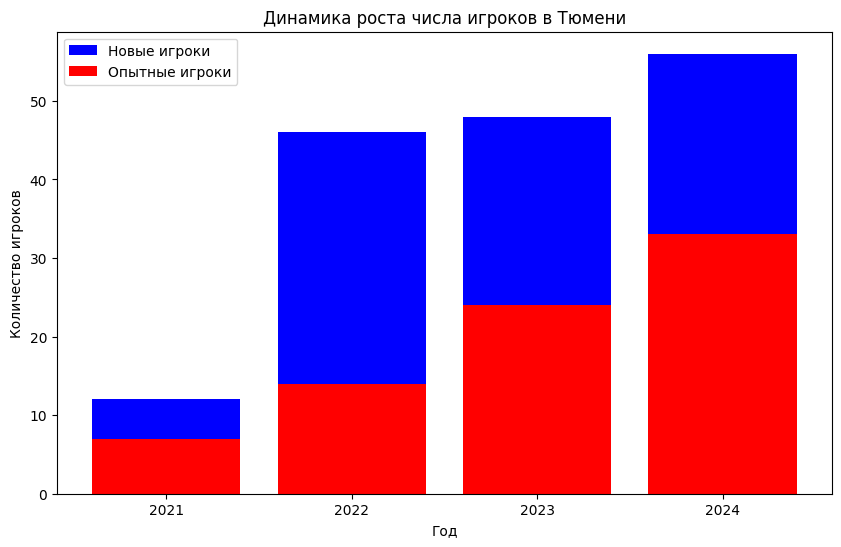

In [9]:
plt.figure(figsize=(10, 6))

# Столбцы для всех игроков
plt.bar(result['year'], result['total_players'], color='blue', label='Новые игроки')
# Столбцы для новых игроков
plt.bar(result['year'], result['total_players'] - result['new_players'], color='red', label='Опытные игроки')

# Настройка заголовка и меток
plt.title('Динамика роста числа игроков в Тюмени')
plt.xlabel('Год')
plt.ylabel('Количество игроков')
plt.legend()

# Показать график
plt.show()

In [10]:
players = pd.read_csv("./players.csv")
players = players.loc[players["Город"] == "Тюмень", ["Имя", "Рейтинг"]]
players.columns = ["name", "raiting"]
players

,name,raiting
270,Поляхов Данил,508
371,Першина Ольга,264
381,Рудаков Данил,159
419,Викулов Артем,30
855,Народицкий Александр,850
...,...,...
14448,Полякова Кристина,60
14451,Пискунов Владислав,87
14454,Рахимбакиев Марат,60
14469,Саргсян Мариам,105


In [11]:
players_list = tournaments.join(players.set_index('name'), on="name", how="inner")
players_list = players_list.loc[:, ["name", "player_url", "raiting"]]
players_list['raiting'] = players_list['raiting'].fillna(0)
players_list["raiting"] = players_list["raiting"].apply(lambda i: int(i))
players_list = players_list.sort_values(by="raiting", ascending=False)
players_list = players_list.drop_duplicates()
players_list = players_list.reset_index()
del players_list["index"]
players_list

,name,player_url,raiting
0,Рочев Ярослав,https://gofederation.ru/players/907053305,2025
1,Курбатов Илья,https://gofederation.ru/players/305019147,1692
2,Булатов Рамиль,https://gofederation.ru/players/955183963,1619
3,Жилин Андрей,https://gofederation.ru/players/296219645,1552
4,Зимин Андрей,https://gofederation.ru/players/679570044,1479
...,...,...,...
92,Кочеров Олег_А,https://gofederation.ru/players/951928654,3
93,Назырова Диана,https://gofederation.ru/players/466880820,3
94,Цыкалова Елизавета,https://gofederation.ru/players/715278722,3
95,Бессонова Елизавета,https://gofederation.ru/players/204239594,3


In [17]:
driver = webdriver.Chrome()

def get_player_info(url):    
    driver.get(url)
    raiting = driver.find_element(By.XPATH, "/html/body/div/div/div[2]/div/div/div[2]/div[1]/div[2]").text
    rang = driver.find_element(By.XPATH, "/html/body/div/div/div[2]/div/div/div[2]/div[2]/div[2]").text
    tournaments_plays = driver.find_element(By.XPATH, "/html/body/div/div/div[2]/div/div/div[2]/div[3]/div[2]").text
    games = driver.find_element(By.XPATH, "/html/body/div/div/div[2]/div/div/div[2]/div[4]/div[2]").text
    return raiting, rang, tournaments_plays, games

for i, row in players_list.iterrows():
    raiting, rang, tournaments_plays, games = get_player_info(row["player_url"])
    players_list.loc[i, "raiting"] = raiting
    players_list.loc[i, "rang"] = rang
    players_list.loc[i, "tournaments_plays"] = tournaments_plays
    players_list.loc[i, "games"] = games
driver.quit()
players_list

NoSuchElementException: Message: no such element: Unable to locate element: {"method":"xpath","selector":"/html/body/div/div/div[2]/div/div/div[2]/div[2]/div[3]"}
  (Session info: chrome=131.0.6778.265); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
	GetHandleVerifier [0x00007FF62E9D80D5+2992373]
	(No symbol) [0x00007FF62E66BFD0]
	(No symbol) [0x00007FF62E50590A]
	(No symbol) [0x00007FF62E55926E]
	(No symbol) [0x00007FF62E55955C]
	(No symbol) [0x00007FF62E5A27D7]
	(No symbol) [0x00007FF62E57F3AF]
	(No symbol) [0x00007FF62E59F584]
	(No symbol) [0x00007FF62E57F113]
	(No symbol) [0x00007FF62E54A918]
	(No symbol) [0x00007FF62E54BA81]
	GetHandleVerifier [0x00007FF62EA36A2D+3379789]
	GetHandleVerifier [0x00007FF62EA4C32D+3468109]
	GetHandleVerifier [0x00007FF62EA40043+3418211]
	GetHandleVerifier [0x00007FF62E7CC78B+847787]
	(No symbol) [0x00007FF62E67757F]
	(No symbol) [0x00007FF62E672FC4]
	(No symbol) [0x00007FF62E67315D]
	(No symbol) [0x00007FF62E662979]
	BaseThreadInitThunk [0x00007FFFA83E7374+20]
	RtlUserThreadStart [0x00007FFFA9E7CC91+33]


In [13]:
players_list["name"] = players_list["name"].apply(lambda s: s[:(s.find("_") if s.find("_")>0 else len(s))])
players_list["rang"] = players_list["rang"].apply(lambda x: str(x).replace('k', ' кю').replace('d', ' дан'))
players_list = players_list.reindex(columns=["name", "player_url", "rang", "raiting"])

players_list

,name,player_url,rang,raiting
0,Рочев Ярослав,https://gofederation.ru/players/907053305,1 кю,2025
1,Курбатов Илья,https://gofederation.ru/players/305019147,6 кю,1692
2,Булатов Рамиль,https://gofederation.ru/players/955183963,7 кю,1619
3,Жилин Андрей,https://gofederation.ru/players/296219645,8 кю,1552
4,Зимин Андрей,https://gofederation.ru/players/679570044,9 кю,1479
...,...,...,...,...
92,Кочеров Олег,https://gofederation.ru/players/951928654,30 кю,3
93,Назырова Диана,https://gofederation.ru/players/466880820,30 кю,3
94,Цыкалова Елизавета,https://gofederation.ru/players/715278722,30 кю,3
95,Бессонова Елизавета,https://gofederation.ru/players/204239594,30 кю,3


In [15]:
players_list.index = [i+1 for i in range(len(players_list))]
players_list.index.name = "index"
players_list

,name,player_url,rang,raiting
index,,,,
1,Рочев Ярослав,https://gofederation.ru/players/907053305,1 кю,2025
2,Курбатов Илья,https://gofederation.ru/players/305019147,6 кю,1692
3,Булатов Рамиль,https://gofederation.ru/players/955183963,7 кю,1619
4,Жилин Андрей,https://gofederation.ru/players/296219645,8 кю,1552
5,Зимин Андрей,https://gofederation.ru/players/679570044,9 кю,1479
...,...,...,...,...
93,Кочеров Олег,https://gofederation.ru/players/951928654,30 кю,3
94,Назырова Диана,https://gofederation.ru/players/466880820,30 кю,3
95,Цыкалова Елизавета,https://gofederation.ru/players/715278722,30 кю,3


In [16]:
players_list.to_csv("tyumen_players.csv", index=True)